In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
cast = pd.read_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
release_dates = pd.read_csv('data/release_dates.csv', index_col=None,
                            parse_dates=['date'], infer_datetime_format=True)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


### Make a bar plot of the months in which movies with "Christmas" in their title tend to be released in the USA.

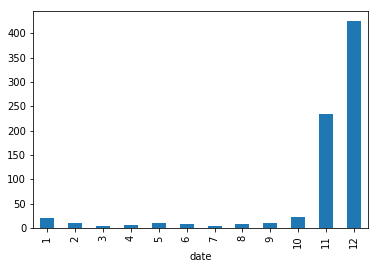

In [5]:
r = release_dates
r = r[r.title.str.contains('Christmas')]
r = r.groupby(r.date.dt.month).size()
r.plot(kind='bar');

### Make a bar plot of the months in which movies whose titles start with "The Hobbit" are released in the USA.

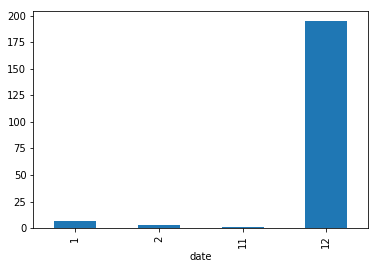

In [6]:
r = release_dates
r = r[r.title.str.startswith('The Hobbit')]
r = r.groupby(r.date.dt.month).size()
r.plot(kind='bar');

### Make a bar plot of the day of the week on which movies with "Romance" in their title tend to be released in the USA.

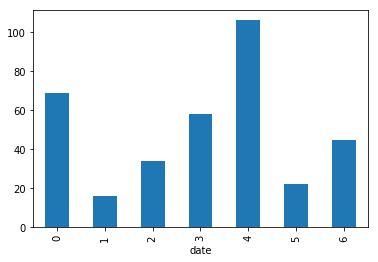

In [7]:
r = release_dates
r = r[r.title.str.contains('Romance')]
r = r.groupby(r.date.dt.dayofweek).size()
r.plot(kind='bar');

### Make a bar plot of the day of the week on which movies with "Action" in their title tend to be released in the USA.

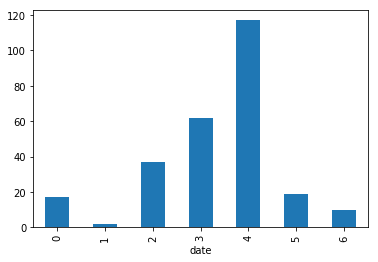

In [8]:
r = release_dates
r = r[r.title.str.contains('Action')]
r = r.groupby(r.date.dt.dayofweek).size()
r.plot(kind='bar');

### On which date was each Judi Dench movie from the 1990s released in the USA?

In [9]:
c = cast
c = c[c.name == 'Judi Dench']
c = c.merge(release_dates[(release_dates.date.dt.year // 10 * 10 == 1990) & (release_dates.country == 'USA')])
c.sort_values('date')

,title,year,name,type,character,n,country,date
0,GoldenEye,1995,Judi Dench,actress,M,6.0,USA,1995-11-17
2,Jack & Sarah,1995,Judi Dench,actress,Margaret,3.0,USA,1996-03-22
1,Hamlet,1996,Judi Dench,actress,Hecuba,12.0,USA,1996-12-25
3,Mrs Brown,1997,Judi Dench,actress,Queen Victoria,1.0,USA,1997-10-03
7,Tomorrow Never Dies,1997,Judi Dench,actress,M,9.0,USA,1997-12-19
4,Shakespeare in Love,1998,Judi Dench,actress,Queen Elizabeth,12.0,USA,1999-01-08
5,Tea with Mussolini,1999,Judi Dench,actress,Arabella,2.0,USA,1999-05-14
6,The World Is Not Enough,1999,Judi Dench,actress,M,6.0,USA,1999-11-19


### In which months do films with Judi Dench tend to be released in the USA?

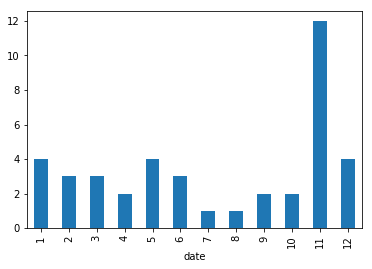

In [10]:
c = cast
c = c[c.name == 'Judi Dench']
c = c.merge(release_dates[release_dates.country == 'USA'])
c.groupby(c.date.dt.month).size().sort_index().plot(kind='bar');

### In which months do films with Tom Cruise tend to be released in the USA?

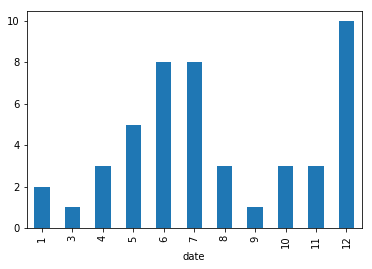

In [11]:
c = cast
c = c[c.name == 'Tom Cruise']
c = c.merge(release_dates[release_dates.country == 'USA'])
c.groupby(c.date.dt.month).size().sort_index().plot(kind='bar');